In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline magic command

UsageError: unrecognized arguments: magic command


In [3]:
root_path = "/home/hwanchang/OmniAnomaly/ServerMachineDataset"

In [4]:
df = pd.read_csv(root_path+'/train/machine-1-1.txt')
with open(root_path+'/interpretation_label/machine-1-1.txt', 'r') as file:
    anomaly_events = file.readlines()

In [5]:
# Renaming the columns for clarity
column_names = [f"Dimension {i+1}" for i in range(38)]
df.columns = column_names

# Re-display the first few rows with updated column names
df.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9,Dimension 10,...,Dimension 29,Dimension 30,Dimension 31,Dimension 32,Dimension 33,Dimension 34,Dimension 35,Dimension 36,Dimension 37,Dimension 38
0,0.043011,0.048729,0.033445,0.025552,0.0,0.915385,0.344633,0.0,0.019160,0.001722,...,0.0,0.004298,0.030041,0.028821,0.0,0.000045,0.035763,0.035833,0.0,0.0
1,0.043011,0.034958,0.032330,0.025552,0.0,0.915385,0.344633,0.0,0.020011,0.000122,...,0.0,0.004298,0.026248,0.021101,0.0,0.000045,0.033012,0.033082,0.0,0.0
2,0.032258,0.028602,0.030100,0.024390,0.0,0.912821,0.342750,0.0,0.021289,0.000000,...,0.0,0.004298,0.030169,0.025733,0.0,0.000022,0.035112,0.035182,0.0,0.0
3,0.032258,0.019068,0.026756,0.023229,0.0,0.912821,0.342750,0.0,0.018734,0.000000,...,0.0,0.004298,0.027240,0.022645,0.0,0.000034,0.033447,0.033517,0.0,0.0
4,0.043011,0.007415,0.021182,0.022067,0.0,0.917949,0.343691,0.0,0.019160,0.000000,...,0.0,0.004298,0.030217,0.022645,0.0,0.000034,0.034171,0.034241,0.0,0.0


In [6]:
# The anomaly information as interpreted from the TXT file
anomaly_info = """
15849-16368:1,9,10,12,13,14,15
16963-17517:1,2,3,4,6,7,9,10,11,12,13,14,15,16,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36
18071-18528:1,2,9,10,12,13,14,15
19367-20088:1,2,3,4,9,10,11,12,13,14,15,16,25,28
20786-21195:1,9,10,12,13,14,15
24679-24682:9,13,14,15
26114-26116:9,13,14,15
27554-27556:9,13,14,15
"""

# Parse the anomaly information
anomalies = []
for line in anomaly_info.strip().split('\n'):
    steps, dimensions = line.split(':')
    start_step, end_step = map(int, steps.split('-'))
    dimensions = list(map(int, dimensions.split(',')))
    for step in range(start_step, end_step + 1):
        anomalies.append({'step': step, 'dimensions': dimensions})

# Convert to DataFrame for easier manipulation
anomalies_df = pd.DataFrame(anomalies)

# Add a column to the original dataframe to label anomalies
df['Anomaly'] = 0  # Assume no anomaly initially
for index, row in anomalies_df.iterrows():
    df.loc[row['step'] - 1, 'Anomaly'] = 1  # -1 to adjust for 0-based indexing in the dataframe

# Verify by displaying rows where anomaly is labeled
df[df['Anomaly'] == 1].head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9,Dimension 10,...,Dimension 30,Dimension 31,Dimension 32,Dimension 33,Dimension 34,Dimension 35,Dimension 36,Dimension 37,Dimension 38,Anomaly
15848,0.075269,0.062500,0.078038,0.075494,0.0,0.905128,0.310734,0.0,0.019728,0.000000,...,0.005731,0.062242,0.046320,0.000000,0.000034,0.065084,0.065079,0.0,0.0,1
15849,0.064516,0.088983,0.084727,0.077816,0.0,0.910256,0.310734,0.0,0.020011,0.000122,...,0.005731,0.060577,0.051981,0.000386,0.000045,0.066821,0.066889,0.0,0.0,1
15850,0.075269,0.169492,0.101449,0.083624,0.0,0.905128,0.308851,0.0,0.019302,0.000000,...,0.005731,0.061922,0.042717,0.000386,0.000011,0.064142,0.064210,0.0,0.0,1
15851,0.064516,0.076271,0.086957,0.078978,0.0,0.905128,0.307910,0.0,0.013767,0.000000,...,0.005731,0.060641,0.052496,0.000386,0.000034,0.066894,0.066889,0.0,0.0,1
15852,0.053763,0.072034,0.081382,0.077816,0.0,0.910256,0.308851,0.0,0.020721,0.000000,...,0.005731,0.052879,0.039115,0.000000,0.000022,0.060450,0.060518,0.0,0.0,1


In [7]:
anomalies_df.head()

,step,dimensions
0,15849,"[1, 9, 10, 12, 13, 14, 15]"
1,15850,"[1, 9, 10, 12, 13, 14, 15]"
2,15851,"[1, 9, 10, 12, 13, 14, 15]"
3,15852,"[1, 9, 10, 12, 13, 14, 15]"
4,15853,"[1, 9, 10, 12, 13, 14, 15]"


In [8]:
2675/28478

0.09393215815717396

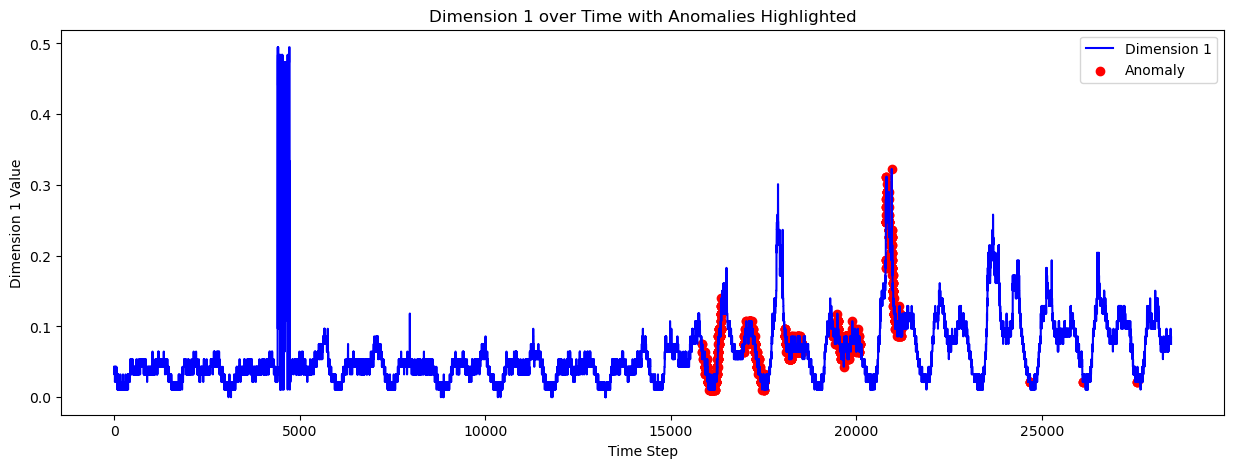

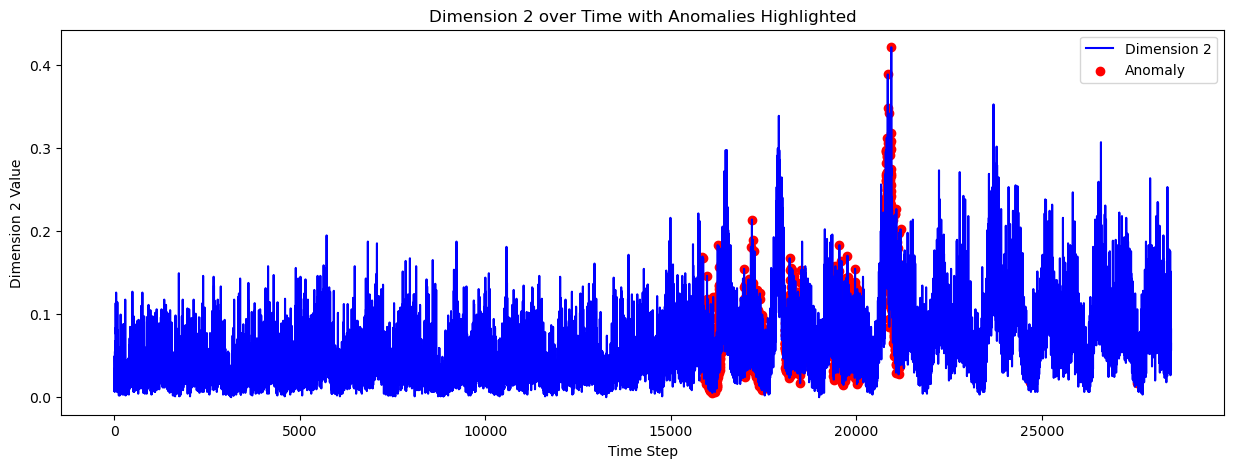

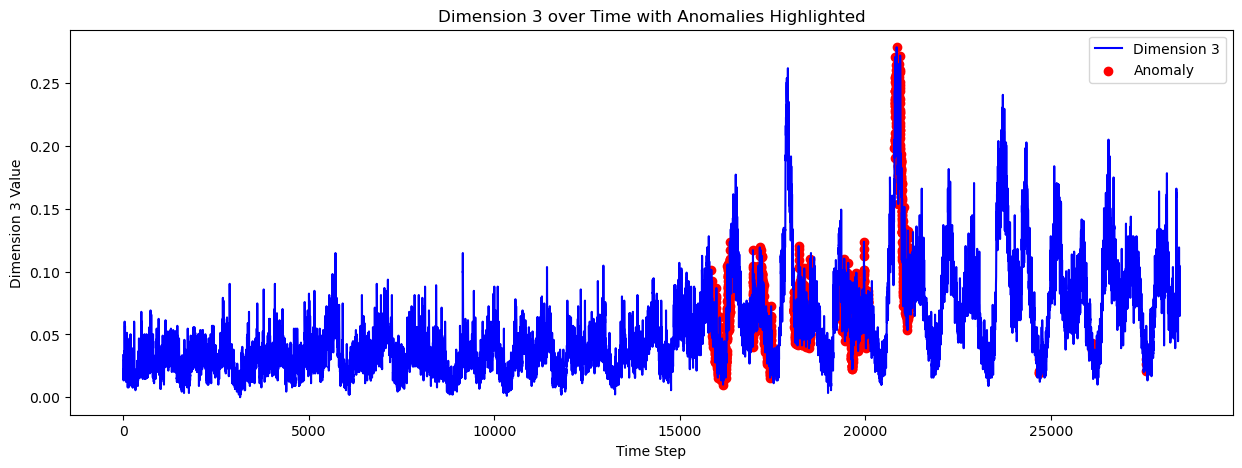

In [9]:
import matplotlib.pyplot as plt

# Function to plot a given dimension with anomalies highlighted
def plot_dimension_with_anomalies(dimension_number):
    plt.figure(figsize=(15, 5))
    plt.plot(df[f"Dimension {dimension_number}"], label=f"Dimension {dimension_number}", color='blue')
    
    # Highlighting anomalies
    anomalies = df[df['Anomaly'] == 1]
    plt.scatter(anomalies.index, anomalies[f"Dimension {dimension_number}"], color='red', label='Anomaly')
    
    plt.title(f"Dimension {dimension_number} over Time with Anomalies Highlighted")
    plt.xlabel("Time Step")
    plt.ylabel(f"Dimension {dimension_number} Value")
    plt.legend()
    plt.show()

# Plotting the first three dimensions as an example
for i in range(1, 4):
    plot_dimension_with_anomalies(i)